# **Visualisation**

## Objectives

* To examine the cleaned dataset for correlations which may support/ disprove our hypotheses
* To produce visualisations which explore relationships, particularly those relating to attrition flag and:
    * Age
    * Education Level
    * Income Level
    * Gender

## Inputs

* The cleaned dataset produced in the Transformation stage
* Use of y-data and visualisations produced in Extraction and Transformation stages to inform next steps
* Any addtional information, from correlations for example, that may help with insights
* The project hypotheses as outlined in README file

## Outputs

* Visualisations using Matplotlib, Seaborn and Plotly which may help explore correlations and relationships

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [ ]:
import os
current_dir = os.getcwd()
current_dir

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [ ]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

Confirm the new current directory

In [ ]:
current_dir = os.getcwd()
current_dir

# Section 1

### Exploratory Visualisations

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
##Import the cleaned dataset
df = pd.read_csv('Data/Processed/BankChurners_transformed.csv')  #Change to cleaned dataset when available
df.head()

In [ ]:
df["Income_Category"].value_counts()

In [ ]:
##Box plots showing the distribution of Age and Education_Levelfor attrited and non-attrited customers
# Order education level by typical hierarchy *unknown level not shown*
education_order = ['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate']
df['Education_Level'] = pd.Categorical(df['Education_Level'], categories=education_order, ordered=True)

plt.figure(figsize=(12, 5))
sns.boxplot(x='Education_Level', y='Customer_Age', hue='Attrition_Flag_Original', data=df)
plt.title('Age Distribution by Education Level and Attrition Status')
plt.xlabel('Education Level')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

In [ ]:
##Box plots showing the distribution of Age and Income_Level for attrited and non-attrited customers
# Order income level by typical hierarchy *unknown level not shown*
income_order = ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']
df['Income_Category'] = pd.Categorical(df['Income_Category'], categories=income_order, ordered=True)

plt.figure(figsize=(12, 5))

sns.boxplot(x='Income_Category', y='Customer_Age', hue='Attrition_Flag_Original', data=df)
plt.title('Age Distribution by Income Level and Attrition Status')
plt.xlabel('Income Level')
plt.ylabel('Age')


plt.tight_layout()
plt.show()

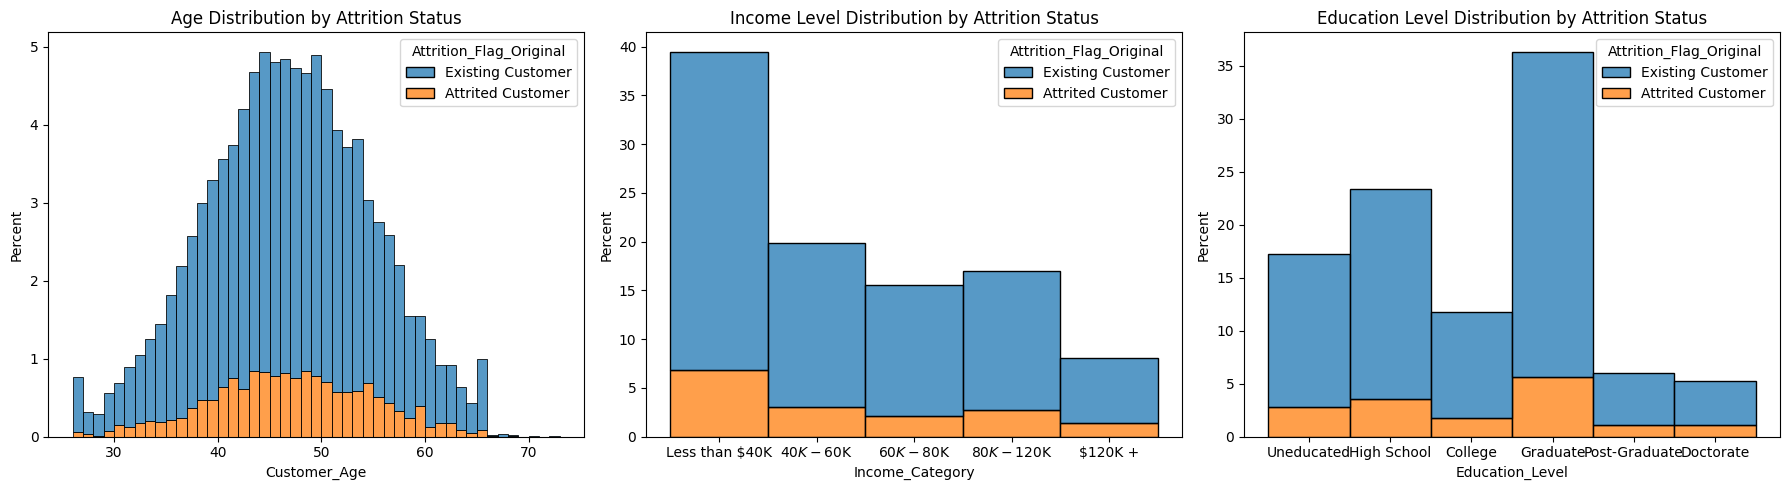

In [ ]:
#Histograms showing distribution of Age, Income_Level and Education_Level for attrited and non-attrited customers
#show percentage of customers instead of count


fig, axes = plt.subplots(1, 3, figsize=(18, 5)) 
sns.histplot(data=df, x='Customer_Age', hue='Attrition_Flag_Original', multiple='stack', stat='percent', ax=axes[0])
axes[0].set_title('Age Distribution by Attrition Status')
sns.histplot(data=df, x='Income_Category', hue='Attrition_Flag_Original', multiple='stack', stat='percent', ax=axes[1])
axes[1].set_title('Income Level Distribution by Attrition Status')
sns.histplot(data=df, x='Education_Level', hue='Attrition_Flag_Original', multiple='stack', stat='percent', ax=axes[2])
axes[2].set_title('Education Level Distribution by Attrition Status')
plt.tight_layout()
plt.show()

In [ ]:

# Create age groups
df['Age_Group'] = pd.cut(df['Customer_Age'], bins=[0, 25, 35, 45, 55, 65, 100], labels=['<25', '25-34', '35-44', '45-54', '55-64', '65+'])
df.head()


,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Age_Group,Attrition_Flag_Original,Attrition_Flag_Existing Customer
0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,...,777,11914.0,1.335,1144.0,42,1.625,0.061,35-44,Existing Customer,1
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,...,864,7392.0,1.541,1291.0,33,3.714,0.105,45-54,Existing Customer,1
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,...,0,3418.0,2.594,1887.0,20,2.333,0.000,45-54,Existing Customer,1
3,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,...,2517,796.0,1.405,1171.0,20,2.333,0.760,35-44,Existing Customer,1
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,...,0,4716.0,2.175,816.0,28,2.500,0.000,35-44,Existing Customer,1


C:\Users\mikee\AppData\Local\Temp\ipykernel_33420\2822601691.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\mikee\AppData\Local\Temp\ipykernel_33420\2822601691.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Age_Group,Income_Category,Education_Level,Attrition_Flag_Original,Count
0,<25,Less than $40K,Uneducated,Attrited Customer,0
1,<25,Less than $40K,Uneducated,Existing Customer,0
2,<25,Less than $40K,High School,Attrited Customer,0
3,<25,Less than $40K,High School,Existing Customer,0
4,<25,Less than $40K,College,Attrited Customer,0


In [30]:
#create a sunburst chart to show the percentage of attrited customers in each of the following categories: Age_Group, Income_Category, Education_Level
fig = px.sunburst(attrition_summary, path=['Age_Group', 'Income_Category', 'Education_Level'], values='Attrition_Percentage', title='Attrition Percentage by Age Group, Income Level, and Education Level')
fig.update_traces(textinfo='label+percent entry')
fig.show()

c:\Users\mikee\Desktop\Hackathon1\Team1_Hackathon\.venv\Lib\site-packages\plotly\express\_core.py:1699: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

c:\Users\mikee\Desktop\Hackathon1\Team1_Hackathon\.venv\Lib\site-packages\plotly\express\_core.py:1699: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

c:\Users\mikee\Desktop\Hackathon1\Team1_Hackathon\.venv\Lib\site-packages\plotly\express\_core.py:1699: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default a

---

# Section 2

Section 2 content

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
# import os
# try:
#   # create your folder here
#   # os.makedirs(name='')
# except Exception as e:
#   print(e)
